# Exercício 7
_Victor Emanuel Perticarrari Osório_

In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, export_graphviz
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2, SequentialFeatureSelector
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, precision_score, get_scorer_names
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import RidgeCV, LogisticRegression

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# A) Seleção de atributos e redução de dimensionalidade

## 1.Carregando Dataset

Lendo dataset a considerando a categoria como números

In [2]:
dfGeneDrug = pd.read_csv('gene-drug-test.csv').set_index('name')
dfGeneDrug['Category'] = pd.Categorical(dfGeneDrug['Category'])
dfGeneDrug['Code'] = dfGeneDrug['Category'].cat.codes

dfGeneDrug

,Mitomycin,Porfiromycin,Carmustine_(BCNU),Chlorozotocin,Clomesone,Lomustine_(CCNU),Mitozolamide,PCNU,Semustine_(MeCCNU),Asaley,...,Taxol_analog_9,Taxol_analog_10,Taxol_analog_11,Geldanamycin,3-Hydropicolinaldehyde-thiosemicarbazone,5-Hydroxypicolinaldehyde-thiosemicarbazone,Inosine-glycodialdehyde,Gemcitabine,Category,Code
name,,,,,,,,,,,,,,,,,,,,,
ABCA1,-0.005728,-0.010251,0.213157,0.255619,0.087824,0.302058,0.175523,0.164136,0.177113,0.355767,...,0.124049,0.009704,-0.052499,0.074925,0.318216,0.182131,-0.065994,0.121245,Transporter,5
ABCA2,-0.044587,0.043600,-0.107541,0.002564,0.057564,0.047830,-0.088138,0.029925,-0.034347,0.068064,...,-0.011423,0.060266,0.109640,0.099574,0.093316,0.220406,0.134427,0.154513,Transporter,5
ABCA4,0.018894,0.097074,0.212427,-0.041018,0.213042,0.057218,0.087730,0.093837,0.139256,0.132200,...,0.146479,0.061052,-0.032011,0.127430,-0.028956,-0.046351,0.101048,0.011623,Transporter,5
ABCA5,-0.010097,-0.050817,-0.201478,-0.119905,-0.300130,-0.154843,-0.171674,-0.210085,-0.132950,-0.181702,...,0.074752,0.153693,0.143052,0.079874,-0.233601,-0.265675,-0.148781,-0.126315,Transporter,5
ABCA7,0.022397,0.069963,-0.091184,-0.145500,-0.137955,-0.138202,-0.109726,-0.110401,-0.126757,-0.112074,...,0.190451,0.222634,0.167930,0.091479,-0.099894,0.046425,0.054116,0.031716,Transporter,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VDAC3,-0.067146,-0.110991,-0.007510,0.000456,0.057175,0.157436,0.006010,0.121504,-0.030282,-0.159701,...,0.111908,0.213902,0.297173,0.118500,-0.026009,0.018550,0.082448,-0.000955,Channel,1
VIAAT,-0.017425,0.003690,-0.199145,-0.057808,-0.274055,-0.220356,-0.056733,-0.157432,-0.134191,-0.148598,...,-0.074962,-0.152942,-0.197705,-0.132760,-0.014061,-0.008111,-0.149030,0.034586,Transporter,5
VIAATb,-0.132056,-0.078568,-0.117847,-0.215210,-0.271793,-0.107600,-0.203604,-0.208581,-0.250593,-0.039191,...,-0.098141,-0.035195,-0.049813,-0.020701,0.018523,-0.051314,0.039436,-0.020127,Transporter,5


### Vendo correlação entre colunas
O próximo passo é ver a correlação entre as colunas, quanto mais próximo de 1, maior a correlação. Colunas com correlação alta podem indicar colunas que podem ser descartados.

In [3]:
corr = dfGeneDrug.corr()
corr

,Mitomycin,Porfiromycin,Carmustine_(BCNU),Chlorozotocin,Clomesone,Lomustine_(CCNU),Mitozolamide,PCNU,Semustine_(MeCCNU),Asaley,...,Taxol_analog_8,Taxol_analog_9,Taxol_analog_10,Taxol_analog_11,Geldanamycin,3-Hydropicolinaldehyde-thiosemicarbazone,5-Hydroxypicolinaldehyde-thiosemicarbazone,Inosine-glycodialdehyde,Gemcitabine,Code
Mitomycin,1.000000,0.902602,0.456340,0.392093,0.549755,0.340960,0.622375,0.582913,0.430202,0.306406,...,0.203923,0.280435,0.325142,0.231929,0.163517,0.383983,0.441555,0.038879,0.556483,0.044154
Porfiromycin,0.902602,1.000000,0.370992,0.233868,0.502399,0.265006,0.526877,0.479945,0.447188,0.240346,...,0.137871,0.316153,0.281367,0.267427,0.178115,0.369012,0.425478,0.146733,0.545793,0.056343
Carmustine_(BCNU),0.456340,0.370992,1.000000,0.522208,0.715443,0.745182,0.653678,0.719003,0.750335,0.686311,...,0.329907,0.519078,0.477727,0.225274,0.486130,0.368214,0.546623,0.517120,0.388289,0.006737
Chlorozotocin,0.392093,0.233868,0.522208,1.000000,0.726280,0.586364,0.831874,0.775605,0.481568,0.494786,...,0.010823,0.018646,0.071617,-0.136422,-0.032953,0.499847,0.415818,-0.149108,0.442967,-0.017678
Clomesone,0.549755,0.502399,0.715443,0.726280,1.000000,0.656543,0.793993,0.863937,0.725378,0.529508,...,0.094238,0.241603,0.202812,0.019360,0.173263,0.488716,0.547287,0.172895,0.468424,-0.026582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3-Hydropicolinaldehyde-thiosemicarbazone,0.383983,0.369012,0.368214,0.499847,0.488716,0.466478,0.421311,0.469974,0.283867,0.522614,...,0.112923,-0.004479,0.011351,-0.132539,-0.010993,1.000000,0.772269,0.081629,0.738221,0.060458
5-Hydroxypicolinaldehyde-thiosemicarbazone,0.441555,0.425478,0.546623,0.415818,0.547287,0.510055,0.475257,0.511323,0.418922,0.612888,...,0.092636,0.187779,0.245686,0.057764,0.252290,0.772269,1.000000,0.343972,0.589509,0.023963
Inosine-glycodialdehyde,0.038879,0.146733,0.517120,-0.149108,0.172895,0.417781,0.012877,0.118856,0.270457,0.463499,...,0.463399,0.508514,0.493748,0.462697,0.678485,0.081629,0.343972,1.000000,0.103356,0.039775
Gemcitabine,0.556483,0.545793,0.388289,0.442967,0.468424,0.379310,0.483398,0.541830,0.244664,0.453511,...,0.020493,0.008276,0.027095,-0.124626,-0.133829,0.738221,0.589509,0.103356,1.000000,0.031913


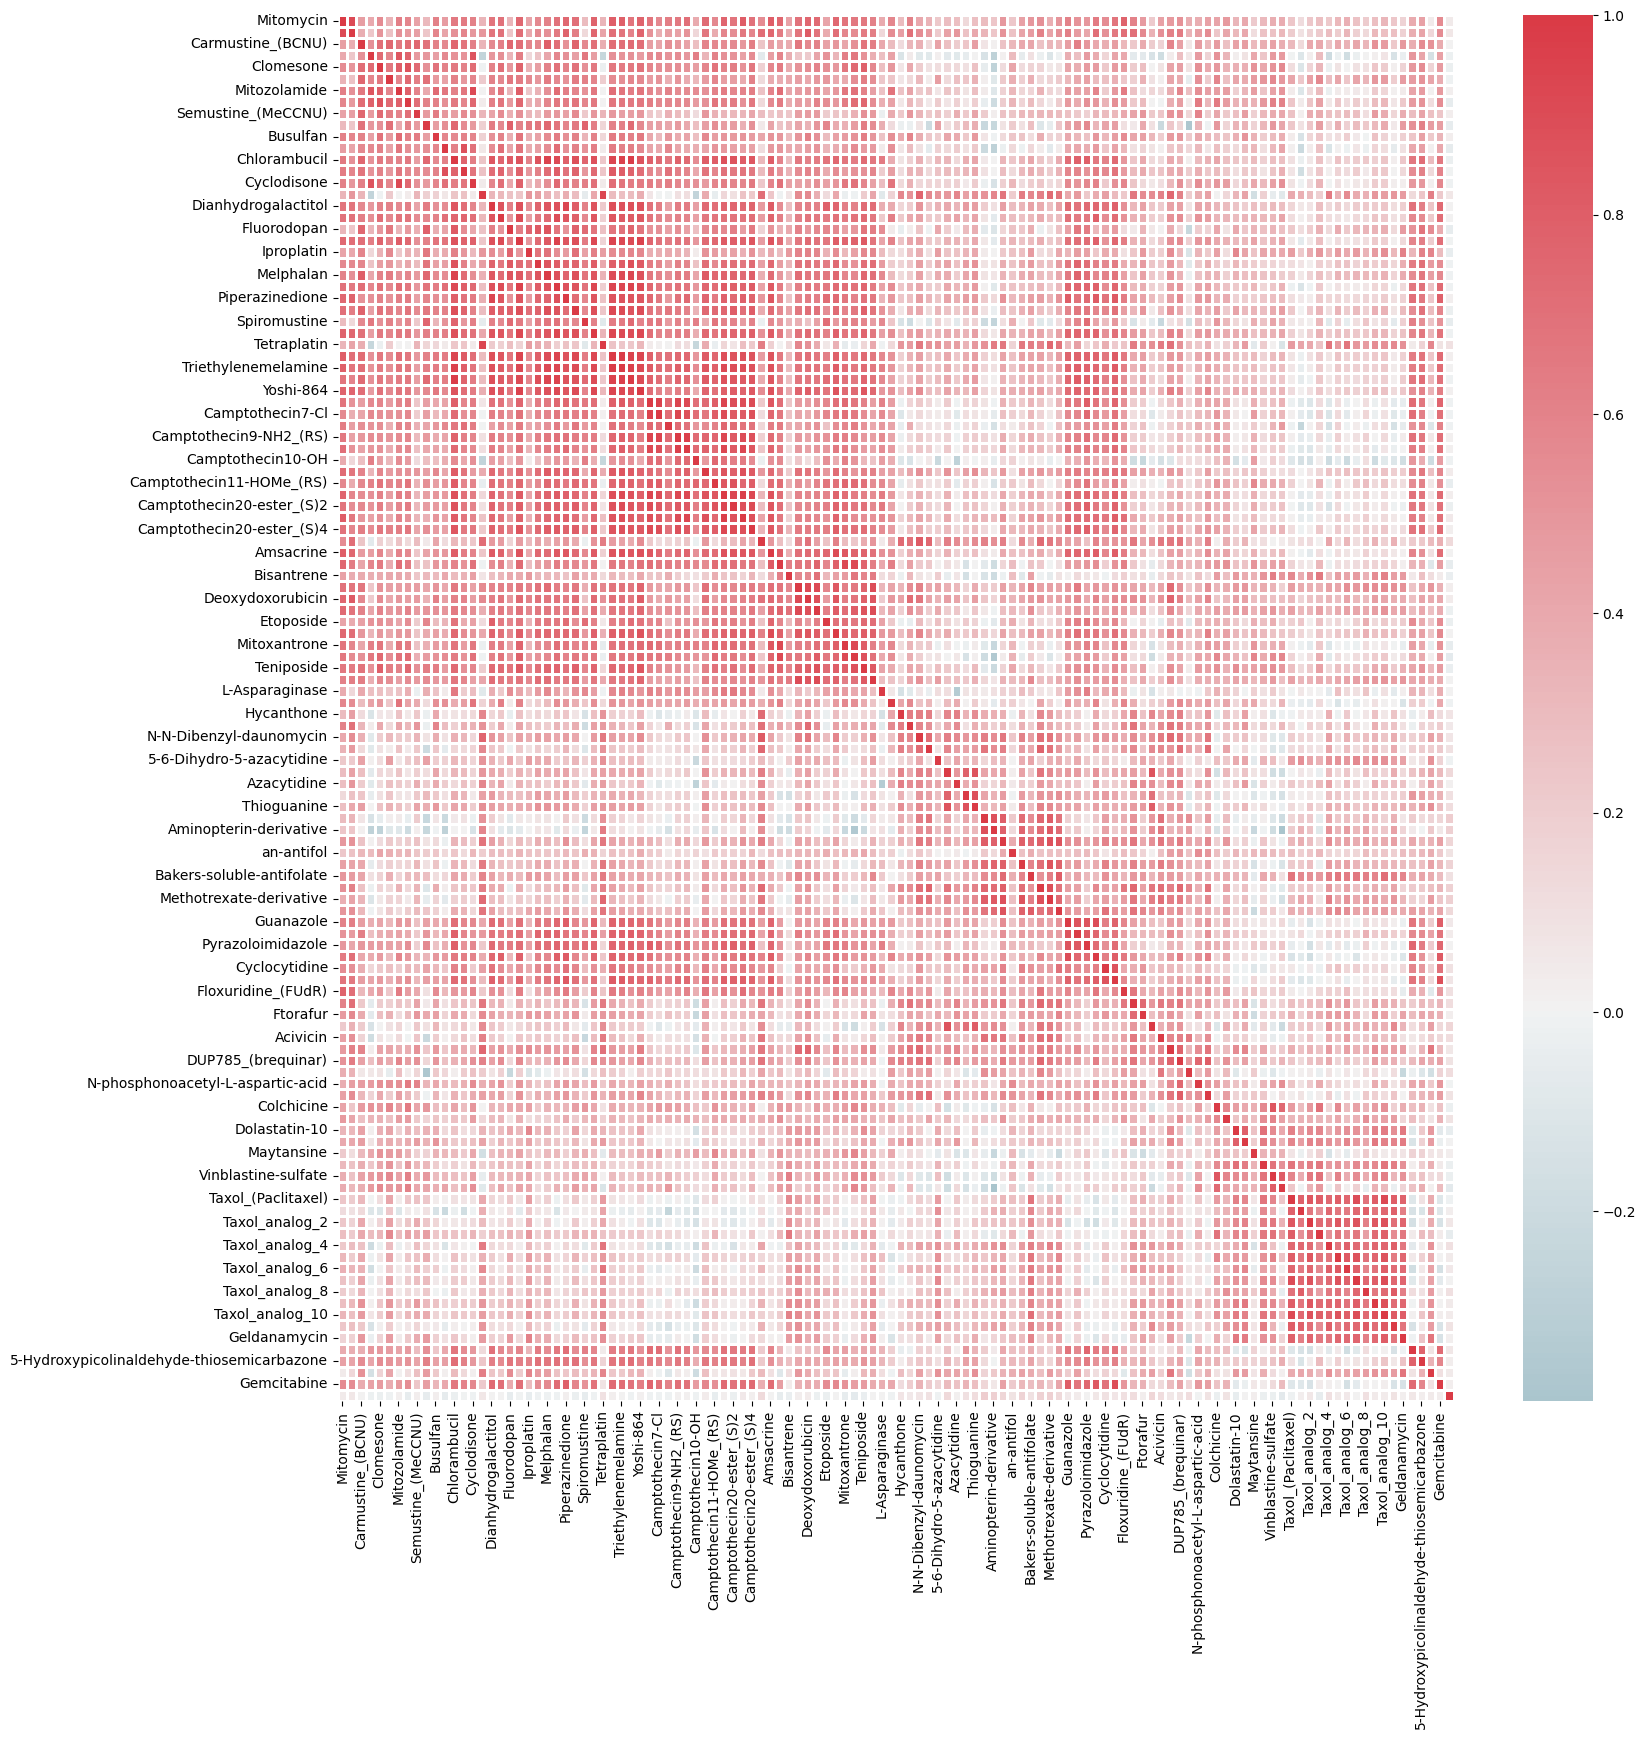

In [4]:
f, ax = plt.subplots(figsize=(18, 18))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
heatmap = sns.heatmap(corr, cmap=cmap, center=0.0, vmax=1, linewidths=1, ax=ax)

## Baseline

Para criar o baseline vamos primeiro normalizar os dados usando MinMaxScaler. E depois todas as validações serão feitas usando os valores padrão para `DecisionTreeClassifier`

In [5]:
scaler = MinMaxScaler()
dfGeneDrug[dfGeneDrug.columns.difference(['Category', 'Code'])] = scaler.fit_transform(dfGeneDrug[dfGeneDrug.columns.difference(['Category', 'Code'])])
dfGeneDrug

,Mitomycin,Porfiromycin,Carmustine_(BCNU),Chlorozotocin,Clomesone,Lomustine_(CCNU),Mitozolamide,PCNU,Semustine_(MeCCNU),Asaley,...,Taxol_analog_9,Taxol_analog_10,Taxol_analog_11,Geldanamycin,3-Hydropicolinaldehyde-thiosemicarbazone,5-Hydroxypicolinaldehyde-thiosemicarbazone,Inosine-glycodialdehyde,Gemcitabine,Category,Code
name,,,,,,,,,,,,,,,,,,,,,
ABCA1,0.447080,0.501244,0.732737,0.783864,0.534845,0.819563,0.721087,0.678801,0.776177,0.895434,...,0.680105,0.612274,0.499645,0.616894,0.924229,0.710535,0.490417,0.598000,Transporter,5
ABCA2,0.391110,0.572022,0.375981,0.440372,0.498302,0.529071,0.394485,0.519215,0.511973,0.603944,...,0.521421,0.670323,0.695612,0.642648,0.640220,0.757766,0.687806,0.640517,Transporter,5
ABCA4,0.482542,0.642305,0.731925,0.381214,0.686058,0.539797,0.612337,0.595210,0.728878,0.668924,...,0.706378,0.671225,0.524407,0.671752,0.485812,0.428586,0.654932,0.457902,Transporter,5
ABCA5,0.440787,0.447926,0.271482,0.274136,0.066351,0.297487,0.291007,0.233826,0.388775,0.350890,...,0.622361,0.777583,0.735995,0.622065,0.227380,0.157937,0.408882,0.281614,Transporter,5
ABCA7,0.487588,0.606672,0.394177,0.239393,0.262193,0.316502,0.367744,0.352356,0.396513,0.421434,...,0.757883,0.856731,0.766063,0.634190,0.396229,0.543072,0.608710,0.483580,Transporter,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VDAC3,0.358619,0.368838,0.487259,0.437511,0.497833,0.654312,0.511108,0.628108,0.517051,0.373181,...,0.665883,0.846706,0.922270,0.662422,0.489532,0.508674,0.636613,0.441826,Channel,1
VIAAT,0.430232,0.519566,0.274078,0.358424,0.097839,0.222629,0.433387,0.296434,0.387225,0.384430,...,0.446997,0.425548,0.324144,0.399906,0.504621,0.475774,0.408636,0.487249,Transporter,5
VIAATb,0.265128,0.411453,0.364516,0.144770,0.100571,0.351469,0.251455,0.235615,0.241788,0.495277,...,0.419846,0.560728,0.502891,0.516985,0.545768,0.422462,0.594252,0.417325,Transporter,5


In [6]:
X = dfGeneDrug.iloc[:,:-2]
y = dfGeneDrug['Code']

dfGeneDrug_train, dfGeneDrug_test = train_test_split(dfGeneDrug, test_size=0.2, stratify=dfGeneDrug['Code'])

X_test = dfGeneDrug_test.iloc[:,:-2]
y_test = dfGeneDrug_test['Code']

X_train = dfGeneDrug_train.iloc[:,:-2]
y_train = dfGeneDrug_train['Code']

feature_names = dfGeneDrug.columns[:-2]


print("Train: {} Test: {}".format(dfGeneDrug_train.shape, dfGeneDrug_test.shape))

Train: (585, 121) Test: (147, 121)


In [7]:
## print("Possível scores: {}".format(get_scorer_names()))

F1 Score: 13.46%
Nós: 174 Profundidade: 18


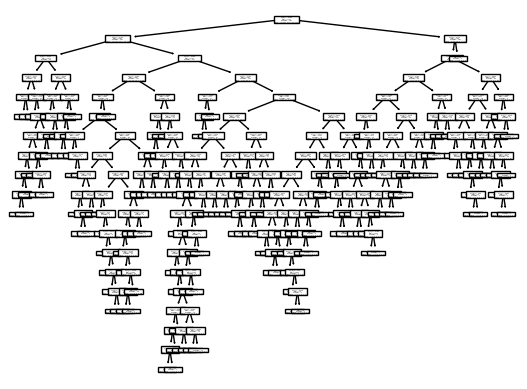

In [8]:
tree_model = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

f1_score  = cross_val_score(tree_model, X_test, y_test, cv=5, scoring='f1_macro').mean() * 100
print("F1 Score: {0:2.2f}%".format(f1_score))
print("Nós: {} Profundidade: {}".format(tree_model.get_n_leaves(), tree_model.get_depth()))


plot_tree(tree_model)
plt.show()

## 1. Usando *Seleção de features baseadas em modelo*

Old shape: (585, 119) New shape: (585, 50)
F1 Score: 20.66%
Nós: 177 Profundidade: 18
Colunas selecionadas: Index(['Mitomycin', 'Asaley', 'Diaminocyclohexyl-Pt-II',
       'Diaziridinylbenzoquinone', 'Iproplatin', 'Camptothecin9-MeO',
       'Camptothecin11-formyl_(RS)', 'Amonafide', 'Amsacrine', 'Daunorubicin',
       'Mitoxantrone', 'Teniposide', 'L-Asparaginase', 'Hycanthone',
       'Morpholino-adriamycin', 'N-N-Dibenzyl-daunomycin',
       '5-6-Dihydro-5-azacytidine', 'alpha-2-Deoxythioguanosine',
       'Azacytidine', 'beta-2-Deoxythioguanosine', 'Aminopterin-derivative',
       'Aminopterin-derivative2', 'Methotrexate', 'Methotrexate-derivative',
       'Trimetrexate', 'Hydroxyurea', 'Floxuridine_(FUdR)',
       'Fluorouracil_(5FU)', 'Ftorafur', 'Thiopurine_(6MP)',
       'Dichloroallyl-lawsone', 'DUP785_(brequinar)', 'L-Alanosine',
       'N-phosphonoacetyl-L-aspartic-acid', 'Colchicine', 'Dolastatin-10',
       'Halichondrin_B', 'Maytansine', 'Trityl-cysteine',
       'Vinblas

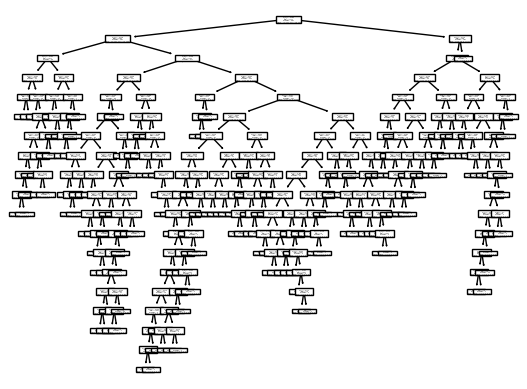

In [9]:
select_model = SelectFromModel(tree_model, prefit=True)
X_train_new = select_model.transform(X_train)
X_test_new = select_model.transform(X_test)
print("Old shape: {} New shape: {}".format(X_train.shape, X_train_new.shape))

reduced_model = DecisionTreeClassifier(random_state=0).fit(X_train_new, y_train)

f1_score  = cross_val_score(reduced_model, X_test_new, y_test, cv=5, scoring='f1_macro').mean() * 100
print("F1 Score: {0:2.2f}%".format(f1_score))
print("Nós: {} Profundidade: {}".format(reduced_model.get_n_leaves(), reduced_model.get_depth()))
print("Colunas selecionadas: {}".format(feature_names[select_model.get_support()]))

plot_tree(reduced_model)
plt.show()

## 2. Usando *Seleção baseada em importância*

Old shape: (585, 119) New shape: (585, 1)
F1 Score: 19.29%
Nós: 413 Profundidade: 26
Colunas selecionadas: Index(['Maytansine'], dtype='object')


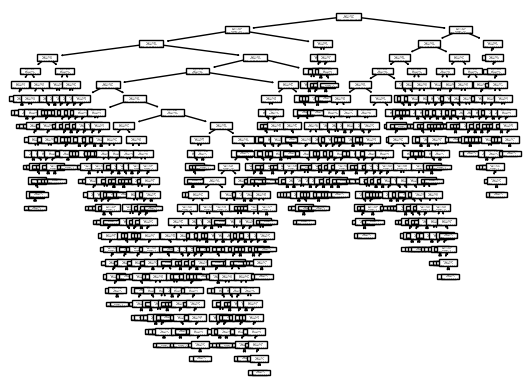

In [10]:
ridge = RidgeCV().fit(X, y)

importance = np.abs(ridge.coef_)
threshold = np.sort(importance)[-5] + 0.1

sfm = SelectFromModel(ridge, threshold=threshold).fit(X, y)
X_train_new = sfm.transform(X_train)
X_test_new = sfm.transform(X_test)
print("Old shape: {} New shape: {}".format(X_train.shape, X_train_new.shape))

reduced_model = DecisionTreeClassifier(random_state=0).fit(X_train_new, y_train)

f1_score  = cross_val_score(reduced_model, X_test_new, y_test, cv=5, scoring='f1_macro').mean() * 100
print("F1 Score: {0:2.2f}%".format(f1_score))
print("Nós: {} Profundidade: {}".format(reduced_model.get_n_leaves(), reduced_model.get_depth()))
print("Colunas selecionadas: {}".format(feature_names[sfm.get_support()]))

plot_tree(reduced_model)
plt.show()

## 3. Usando *Seleção de features univariada*

Old shape: (585, 119) New shape: (585, 10)
F1 Score: 12.76%
Nós: 220 Profundidade: 16
Colunas selecionadas: Index(['L-Asparaginase', 'Hycanthone', 'alpha-2-Deoxythioguanosine',
       'Thioguanine', 'Aminopterin', 'Aminopterin-derivative', 'an-antifol2',
       'Methotrexate', 'Methotrexate-derivative', 'Thiopurine_(6MP)'],
      dtype='object')


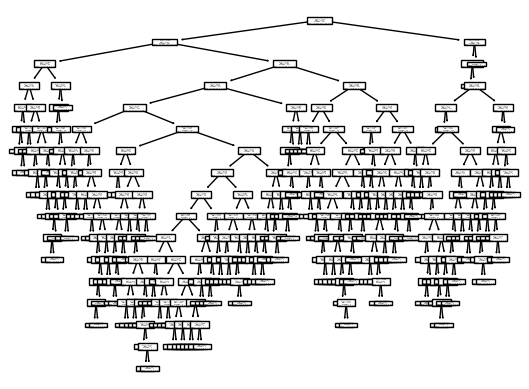

In [11]:
selector = SelectKBest(chi2).fit(X, y)
X_train_new = selector.transform(X_train)
X_test_new = selector.transform(X_test)
print("Old shape: {} New shape: {}".format(X_train.shape, X_train_new.shape))

reduced_model = DecisionTreeClassifier(random_state=0).fit(X_train_new, y_train)

f1_score  = cross_val_score(reduced_model, X_test_new, y_test, cv=5, scoring='f1_macro').mean() * 100
print("F1 Score: {0:2.2f}%".format(f1_score))
print("Nós: {} Profundidade: {}".format(reduced_model.get_n_leaves(), reduced_model.get_depth()))
print("Colunas selecionadas: {}".format(feature_names[selector.get_support()]))

plot_tree(reduced_model)
plt.show()

## 4. Usando *Seletor Sequencial*

Old shape: (585, 119) New shape: (585, 10)
F1 Score: 18.51%
Nós: 229 Profundidade: 23
Colunas selecionadas: Index(['Busulfan', 'Triethylenemelamine', 'Camptothecin9-MeO',
       'Camptothecin20-ester_(S)1', 'an-antifol2', 'Cytarabine_(araC)',
       'Pyrazofurin', 'Vincristine-sulfate', 'Taxol_(Paclitaxel)',
       'Taxol_analog_5'],
      dtype='object')


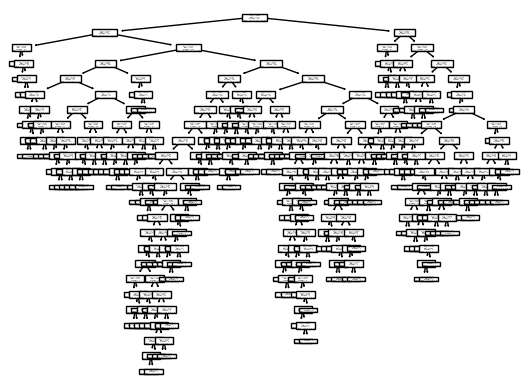

In [12]:
selector = SequentialFeatureSelector(tree_model, n_features_to_select=10).fit(X, y)
X_train_new = selector.transform(X_train)
X_test_new = selector.transform(X_test)

print("Old shape: {} New shape: {}".format(X_train.shape, X_train_new.shape))

reduced_model = DecisionTreeClassifier(random_state=0).fit(X_train_new, y_train)

f1_score  = cross_val_score(reduced_model, X_test_new, y_test, cv=5, scoring='f1_macro').mean() * 100
print("F1 Score: {0:2.2f}%".format(f1_score))
print("Nós: {} Profundidade: {}".format(reduced_model.get_n_leaves(), reduced_model.get_depth()))
print("Colunas selecionadas: {}".format(feature_names[selector.get_support()]))

plot_tree(reduced_model)
plt.show()

## 5. Usando PCA

### PCA

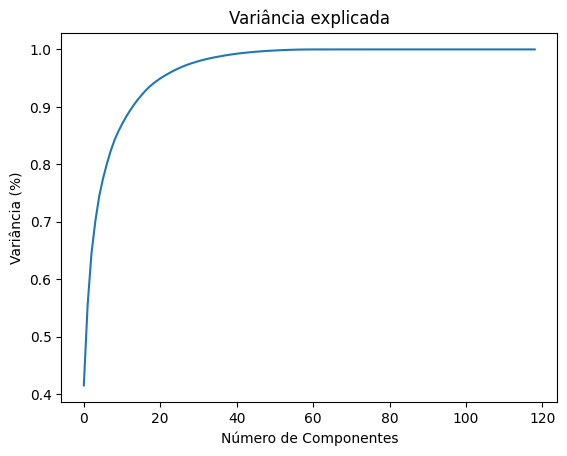

In [13]:
pca = PCA()
principal_components = pca.fit_transform(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Número de Componentes")
plt.ylabel("Variância (%)")
plt.title("Variância explicada")
plt.show()

De acordo com o gráfico acima, se selecionarmos por volta de 19 features temos uma boa seleção de valores.

Old shape: (585, 119) New shape: (585, 20)
F1 Score: 27.19%
Nós: 185 Profundidade: 17


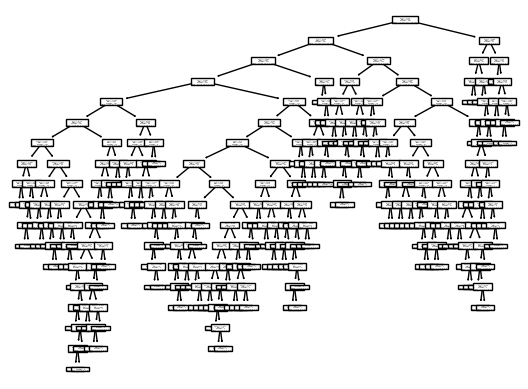

In [14]:
pca = PCA(n_components=20).fit(X)
X_train_new = pca.transform(X_train)
X_test_new = pca.transform(X_test)

print("Old shape: {} New shape: {}".format(X_train.shape, X_train_new.shape))

reduced_model = DecisionTreeClassifier().fit(X_train_new, y_train)

f1_score  = cross_val_score(reduced_model, X_test_new, y_test, cv=5, scoring='f1_weighted').mean() * 100
print("F1 Score: {0:2.2f}%".format(f1_score))
print("Nós: {} Profundidade: {}".format(reduced_model.get_n_leaves(), reduced_model.get_depth()))

plot_tree(reduced_model)
plt.show()

## Conclusões

Usando os valores padrão para `DecisionTreeClassifier` percebeu-se que houve um aumento da qualidade de acordo com o número de features selecionadas para alguns métodos. Esse dataset tem um conjunto ótimo de features em torno de 19 features. Usando o PCA temos um aumento significativo, mas ele não seleciona as features e sim cria um conjunto novo de features baseadas nas features originais.

> **AVISO**
> Os valores de _F1 Score_ são baseados em execuções anteriores.

| Método | F1 Score | Análise |
|:--- | --- |:-- |
| Baseline | 18.03% | Base |
| Modelo | 16.35% | Como é baseado no baseline, o aumento foi pouco e depois apresentou redução. Provavel que esse aumento seja referente a remoção de ruídos. |
| RidgeCV | 15.11% | Caiu a qualidade. Não é um bom seletor para esse modelo |
| Univariada | 19.71% | A seleção basead no chi^2 apresentou um desempenho melhor por remover o erro do baseline. Selecionando as melhroes features |
| Sequencial | 18.47% | A seleção sequencial apresentou um bom score, mas ficou abaixo do chi^2 |
| PCA | 23.79% | Melhor método de seleção de features. |

# B) Desafio

1. Considerando o que é pedido no desafio, faça um classificador utilizando Floresta Aleatória. Teste o desempenho utilizando todos os atributos disponíveis. Este será o seu baseline.
2. Utilize o PCA, bem como algumas técnicas de seleção de atributos e avalie se o desempenho de classificação melhorou em relação ao baseline.
3. Avalie criticamente se alguma estratégia de seleção de atributos ou o PCA deve ser considerada em novas propostas de modelos de classificação no contexto do desafio. Justifique a sua resposta

## Baseline

Para criar o baseline escolhi o critério **entropia** por apresentar um score F1 melhor.

In [15]:
X = dfGeneDrug.iloc[:,:-2]
y = dfGeneDrug['Code']

dfGeneDrug_train, dfGeneDrug_test = train_test_split(dfGeneDrug, test_size=0.2, stratify=dfGeneDrug['Code'])

X_test = dfGeneDrug_test.iloc[:,:-2]
y_test = dfGeneDrug_test['Code']

X_train = dfGeneDrug_train.iloc[:,:-2]
y_train = dfGeneDrug_train['Code']

feature_names = dfGeneDrug.columns[:-2]


print("Train: {} Test: {}".format(dfGeneDrug_train.shape, dfGeneDrug_test.shape))

Train: (585, 121) Test: (147, 121)


In [16]:
c_parameter_values = [0.00005,
                      0.0001,
                      0.0002,
                      0.0005,
                      0.001,
                      0.0015,
                      0.002,
                      0.005,
                      0.01]
df = pd.DataFrame(columns=['min_impurity_decrease', 'f1-score'])
c_best_f1_score = float('-inf')
c_worst_f1_score = float('inf')
c_best_parameter = None
c_worst_parameter = None
c_best_model = None
c_worst_model = None
for input_parameter in c_parameter_values:
    model = DecisionTreeClassifier(min_impurity_decrease=input_parameter, random_state=21)
    model.fit(X_train, y_train)
    
    f1_score = cross_val_score(reduced_model, X_test, y_test, cv=5, scoring='f1_weighted').mean() * 100
    
    df = pd.concat([df, pd.DataFrame([{'min_impurity_decrease' : input_parameter , 'f1-score' : f1_score}])])
    
    if f1_score > c_best_f1_score:
        c_best_f1_score = f1_score
        c_best_parameter = input_parameter
        c_best_model = model
        
    if f1_score < c_worst_f1_score:
        c_worst_f1_score = f1_score
        c_worst_parameter = input_parameter
        c_worst_model = model
    
print(df)
print("Melhor min_impurity_decrease: {}".format(c_best_parameter))
print("Pior min_impurity_decrease: {}".format(c_worst_parameter))

   min_impurity_decrease   f1-score
0                0.00005  32.849728
0                0.00010  28.982033
0                0.00020  30.241202
0                0.00050  28.326649
0                0.00100  27.043951
0                0.00150  29.985422
0                0.00200  31.460633
0                0.00500  31.739594
0                0.01000  30.188761
Melhor min_impurity_decrease: 5e-05
Pior min_impurity_decrease: 0.001


In [17]:
rf_classifier = RandomForestClassifier(random_state=0, criterion="entropy", min_impurity_decrease=0.01).fit(X_train, y_train)
f1_score  = cross_val_score(rf_classifier, X_test, y_test, cv=5, scoring='f1_macro').mean() * 100
print("F1 Score: {0:2.2f}%".format(f1_score))

F1 Score: 13.79%


## Usando PCA

Old shape: (585, 119) New shape: (585, 20)
F1 Score: 26.81%
Nós: 185 Profundidade: 17


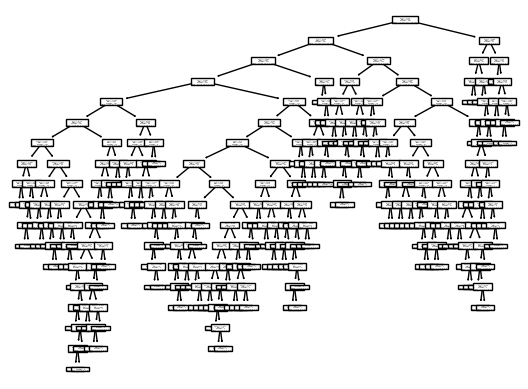

In [18]:
pca = PCA(n_components=20).fit(X)
X_train_new = pca.transform(X_train)
X_test_new = pca.transform(X_test)

print("Old shape: {} New shape: {}".format(X_train.shape, X_train_new.shape))

rf_classifier_red = RandomForestClassifier(random_state=0, criterion="entropy", min_impurity_decrease=0.01).fit(X_train_new, y_train)

f1_score  = cross_val_score(reduced_model, X_test_new, y_test, cv=5, scoring='f1_weighted').mean() * 100
print("F1 Score: {0:2.2f}%".format(f1_score))
print("Nós: {} Profundidade: {}".format(reduced_model.get_n_leaves(), reduced_model.get_depth()))

plot_tree(reduced_model)
plt.show()

## Análise

O PCA sempre apresenta um resultado positivo em relação aos outros métodos. Mas no contextos do desafio onde se deve escolher alguns métodos de análises química ele não deve ser levado em consideração pois os valores usados como features são uma função de todos os valores anteriores.

A ideia dessa análise é escolher qual é o conjunto de drogas deve ser utilizada contra o câncer, como ele não apresenta um subconjunto válido de opções, é um método inútil.